# Taller 3

----------

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import missingno as msno


In [97]:
df = pd.read_csv('diabetesTaller.csv',sep=';')

## Primera Revision
-----

In [98]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


### Revision de datos duplicados

In [99]:
print(f"La cantidad de duplicados es {df.duplicated().sum()}")

La cantidad de duplicados es 0


### Revision preliminar de datos faltantes

In [100]:
from IPython.display import display, HTML

# Calculate the percentage of missing values
missing_data = df.isna().sum().to_frame(name='Valores Faltantes')
missing_data['%Valores Faltantes'] = (missing_data['Valores Faltantes'] / len(df) * 100).round(2)

# Convert to HTML and display
html_table = missing_data.to_html()
print("Tabla de valores faltantes")
display(HTML(html_table))


Tabla de valores faltantes


,Valores Faltantes,%Valores Faltantes
Pregnancies,0,0.00
Glucose,14,1.82
BloodPressure,3,0.39
SkinThickness,2,0.26
Insulin,11,1.43
BMI,4,0.52
DiabetesPedigreeFunction,5,0.65
Age,7,0.91
Outcome,0,0.00


se confirma que existen datos faltantes pero porcentualmente son pocos significativos por ende se pueden imputar sin grandes riesgos de dañar las distribuciones

### Verificar los tipos de variables

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   754 non-null    float64
 2   BloodPressure             765 non-null    float64
 3   SkinThickness             766 non-null    float64
 4   Insulin                   757 non-null    float64
 5   BMI                       764 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       761 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


Para efectos de imputar los faltantes se confirma que las variables son tipo numerico por ende no es necesario codificar variables categoricas

### Se revisan las distribuciones de las variables

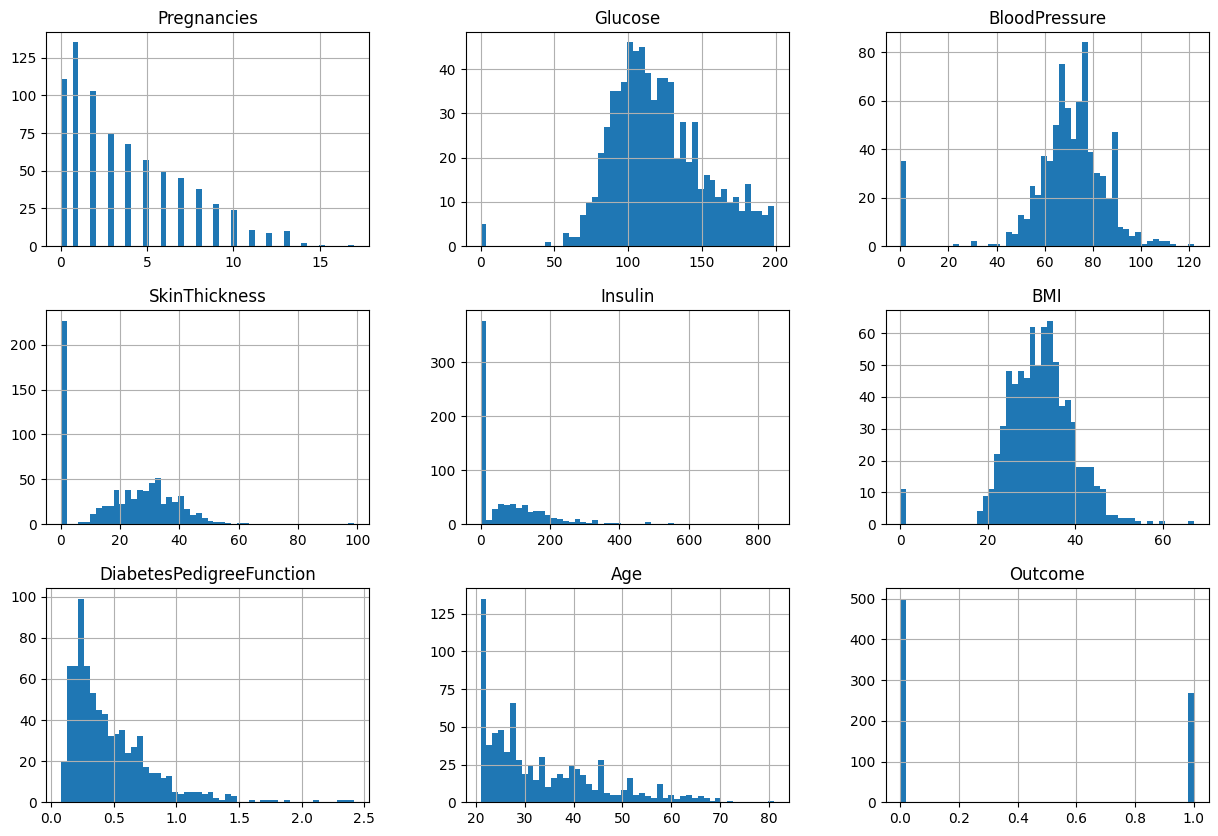

In [102]:
df.hist(figsize=(15, 10), bins=50)
plt.show()

Se concluye que la base de datos tiene valores 0, que se entenderia que dichas variables no fueron medidas porque en caso contrario la persona estaria muerta por ende para efectos del estudio se va a considerar como datos faltantes. Las variables son:
- Glucose
- Blood preasure
- Skin thickness 
- Insulin 
- BMI  

### Remplazo de valores 0 de variables por NAN

In [104]:
# Reemplazar los valores 0 por NaN en las columnas especificadas
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_replace:
    df[column] = pd.to_numeric(df[column], errors='coerce').replace(0, float('nan'))

# Verificar los cambios


#### Tabla de Valores Faltantes Actualizada

In [112]:
from IPython.display import display, HTML

# Calculate the percentage of missing values
missing_data = df.isna().sum().to_frame(name='Valores Faltantes')
missing_data['%Valores Faltantes'] = (missing_data['Valores Faltantes'] / len(df) * 100).round(2)

# Convert to HTML and display
html_table = missing_data.to_html()
print("Tabla de valores faltantes Nuevos")
display(HTML(html_table))

Tabla de valores faltantes


,Valores Faltantes,%Valores Faltantes
Pregnancies,0,0.00
Glucose,19,2.47
BloodPressure,38,4.95
SkinThickness,229,29.82
Insulin,385,50.13
BMI,15,1.95
DiabetesPedigreeFunction,5,0.65
Age,7,0.91
Outcome,0,0.00


Aumentan significativamente los datos faltantes en skin thickness y insulin

### Distribuciones actualizada

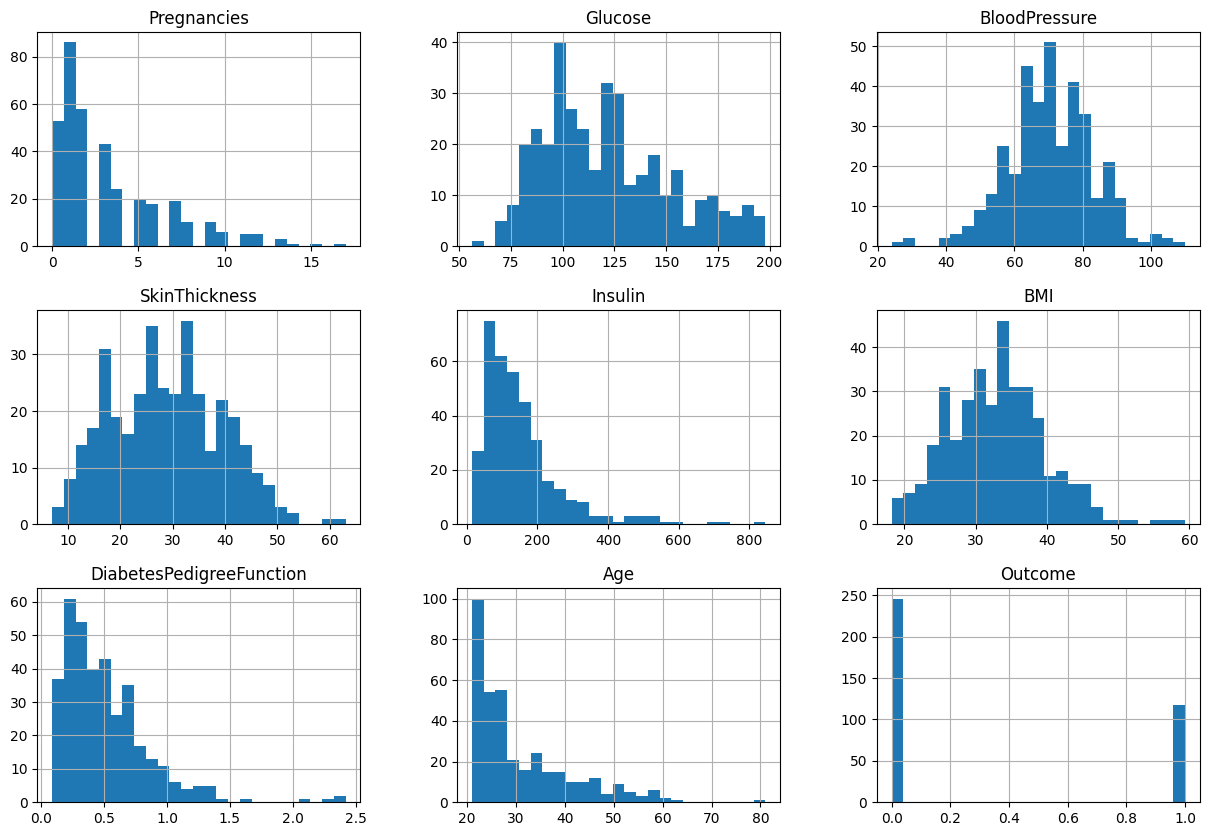

In [115]:
df.dropna().hist(figsize=(15, 10), bins=25)
plt.show()

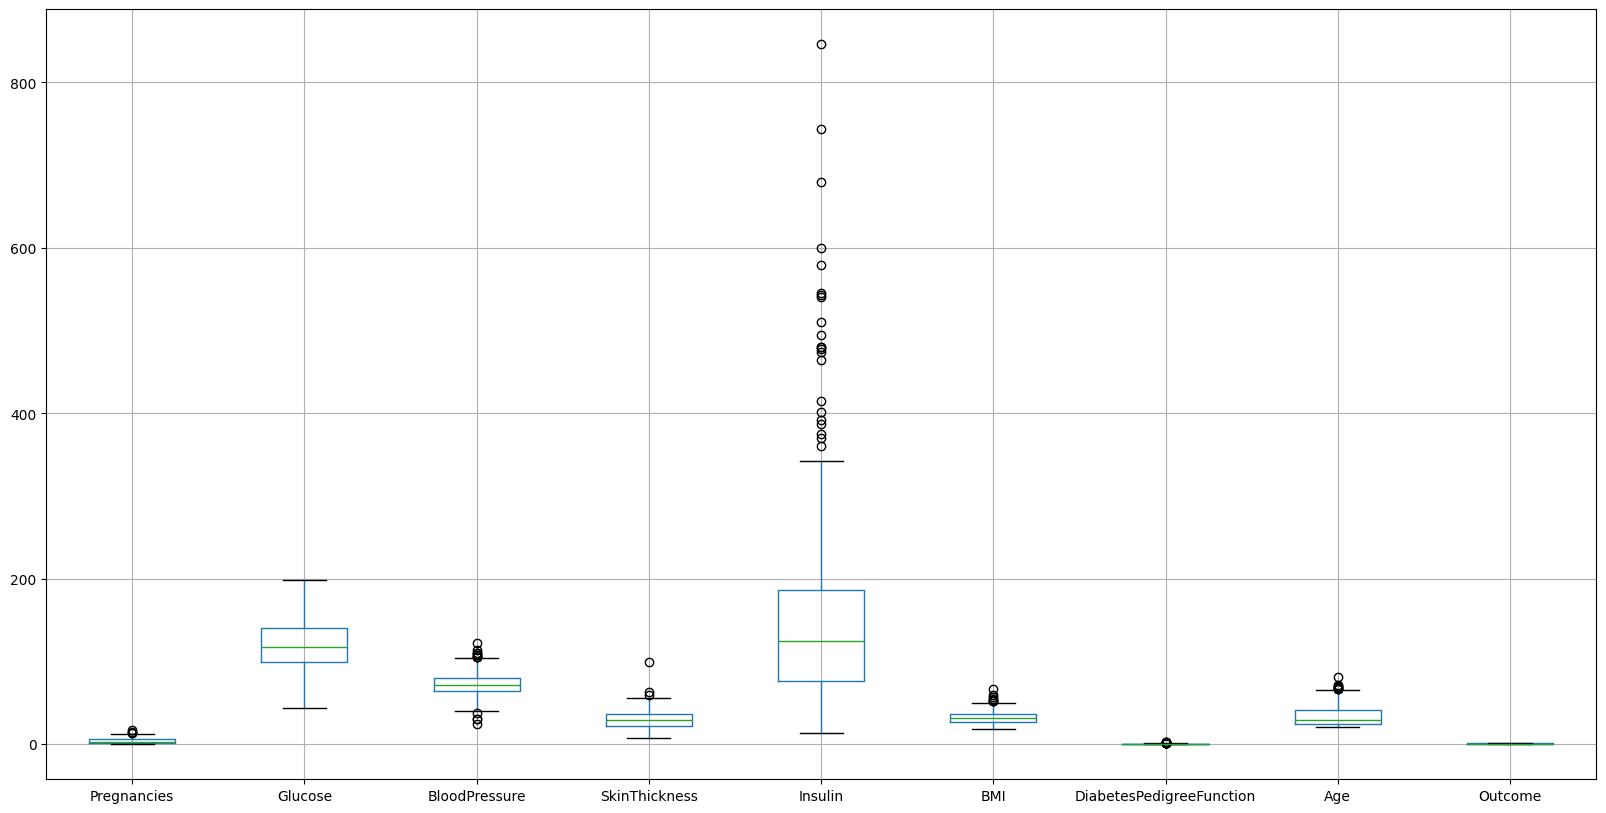

In [122]:
plt.figure(figsize=(20, 10))
df.boxplot()
plt.show()

In [119]:
# Calcular el IQR para cada columna
iqr = df.quantile(0.75) - df.quantile(0.25)

# Determinar los límites inferior y superior
lower_bound = df.quantile(0.25) - 1.5 * iqr
upper_bound = df.quantile(0.75) + 1.5 * iqr

# Identificar los outliers
outliers = ((df < lower_bound) | (df > upper_bound))

# Mostrar los outliers
# Calcular el porcentaje de outliers por columna
outliers_percentage = (outliers.sum() / df.notna().sum() * 100).round(2)


# Mostrar los outliers en la misma tabla
outliers_table = pd.DataFrame({
    'Outliers': outliers.sum(),
    '%Outliers': outliers_percentage
})
display(outliers_table)

,Outliers,%Outliers
Pregnancies,4,0.52
Glucose,0,0.00
BloodPressure,13,1.78
SkinThickness,3,0.56
Insulin,22,5.74
BMI,8,1.06
DiabetesPedigreeFunction,29,3.80
Age,9,1.18
Outcome,0,0.00


In [121]:
# Filtrar el dataframe para eliminar los outliers
df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


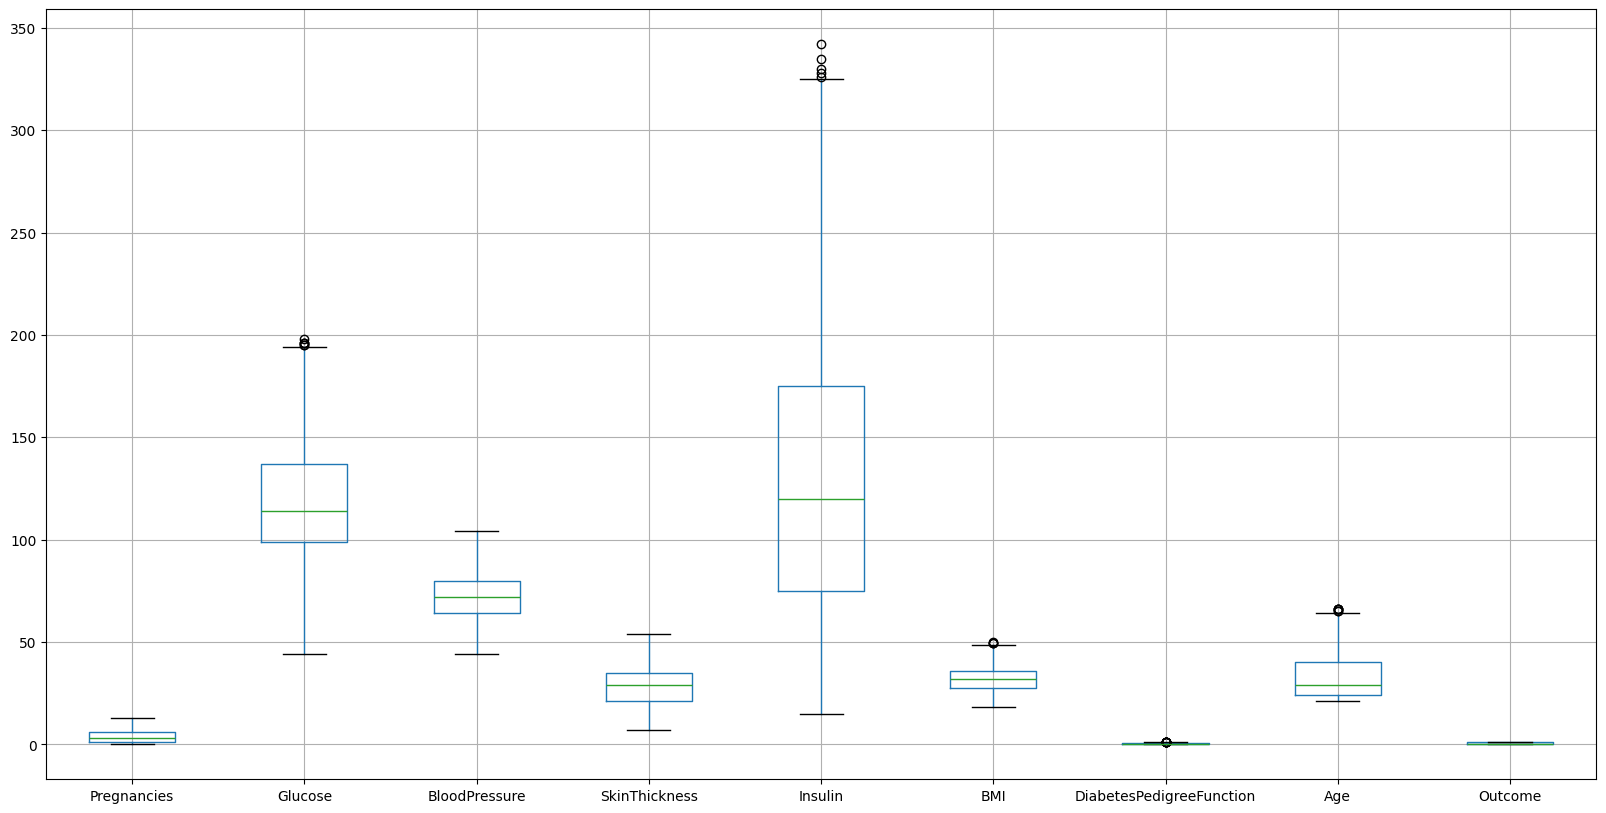

In [123]:
plt.figure(figsize=(20, 10))
df_filtered.boxplot()
plt.show()

In [124]:
df_filtered.isna().sum()

Pregnancies                   0
Glucose                      17
BloodPressure                35
SkinThickness               211
Insulin                     355
BMI                          13
DiabetesPedigreeFunction      4
Age                           6
Outcome                       0
dtype: int64

In [128]:
from sklearn.impute import KNNImputer

# Crear el imputador KNN
knn_imputer = KNNImputer(n_neighbors=5)

# Realizar la imputación
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_filtered), columns=df_filtered.columns)

# Verificar los cambios
print("Datos después de la imputación con KNN:")
print(df_imputed.isna().sum())

Datos después de la imputación con KNN:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


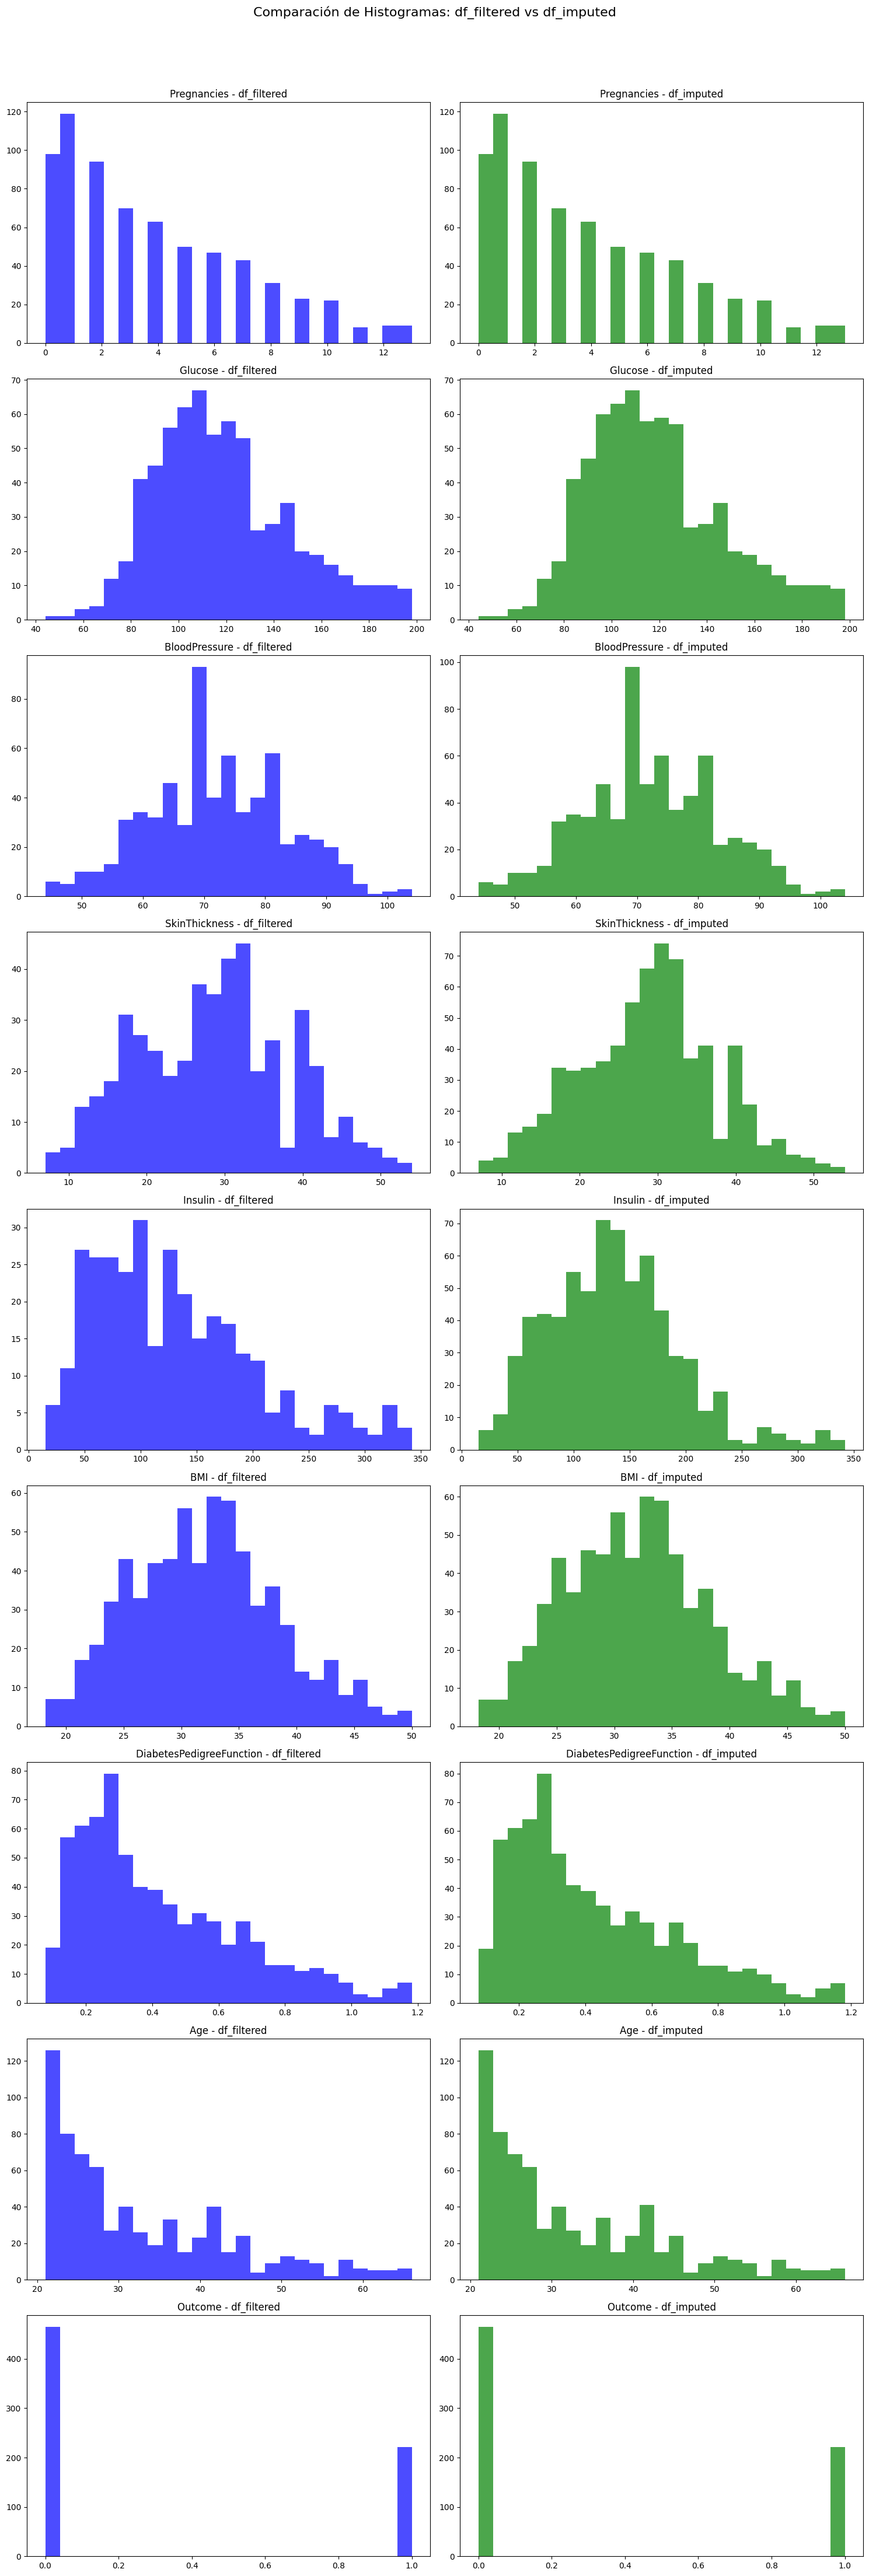

In [130]:
# Generar histogramas para cada variable en df_imputed
# Generar gráficos en parejas para cada variable en df_filtered y df_imputed
variables = df_filtered.columns

fig, axes = plt.subplots(len(variables), 2, figsize=(15, 5 * len(variables)))
fig.suptitle('Comparación de Histogramas: df_filtered vs df_imputed', fontsize=16)

for i, var in enumerate(variables):
    # Histograma para df_filtered
    axes[i, 0].hist(df_filtered[var].dropna(), bins=25, alpha=0.7, color='blue')
    axes[i, 0].set_title(f'{var} - df_filtered')
    
    # Histograma para df_imputed
    axes[i, 1].hist(df_imputed[var].dropna(), bins=25, alpha=0.7, color='green')
    axes[i, 1].set_title(f'{var} - df_imputed')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [132]:
# Calcular la cantidad de cada valor en la columna 'Outcome'
outcome_counts = df_imputed['Outcome'].value_counts()

# Calcular el porcentaje de cada valor en la columna 'Outcome'
outcome_percentages = df_imputed['Outcome'].value_counts(normalize=True) * 100

# Crear un DataFrame con los resultados
outcome_summary = pd.DataFrame({
    'Cantidad': outcome_counts,
    'Porcentaje': outcome_percentages.round(2)
})

# Mostrar el DataFrame
print(outcome_summary)

         Cantidad  Porcentaje
Outcome                      
0.0           465       67.78
1.0           221       32.22


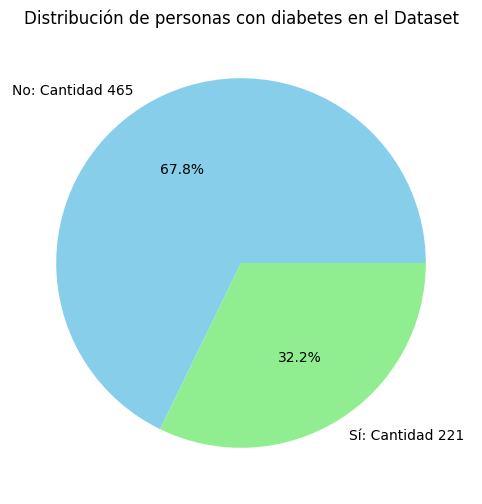

In [144]:
# Crear etiquetas con cantidades y porcentajes
labels = [f'{"Sí:" if outcome == 1 else "No:"} Cantidad {count}' for outcome, count, percentage in zip(outcome_counts.index, outcome_counts, outcome_percentages)]

# Graficar el gráfico de pastel
outcome_counts.plot(kind='pie', figsize=(10, 6), labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.title('Distribución de personas con diabetes en el Dataset')
plt.show()

In [145]:
from imblearn.over_sampling import ADASYN

# Si no tienes instalada la biblioteca imbalanced-learn, descomenta la siguiente línea para instalarla
# !pip install imbalanced-learn


# Separar las características y la variable objetivo
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Crear el sobremuestreador ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

# Aplicar ADASYN para sobremuestrear la clase minoritaria
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Combinar las características y la variable objetivo en un nuevo DataFrame
df_adasyn = pd.DataFrame(X_resampled, columns=X.columns)
df_adasyn['Outcome'] = y_resampled

# Verificar la distribución de la variable objetivo después del sobremuestreo
print("Distribución de 'Outcome' después de ADASYN:")
print(df_adasyn['Outcome'].value_counts())

Distribución de 'Outcome' después de ADASYN:
Outcome
0.0    465
1.0    427
Name: count, dtype: int64


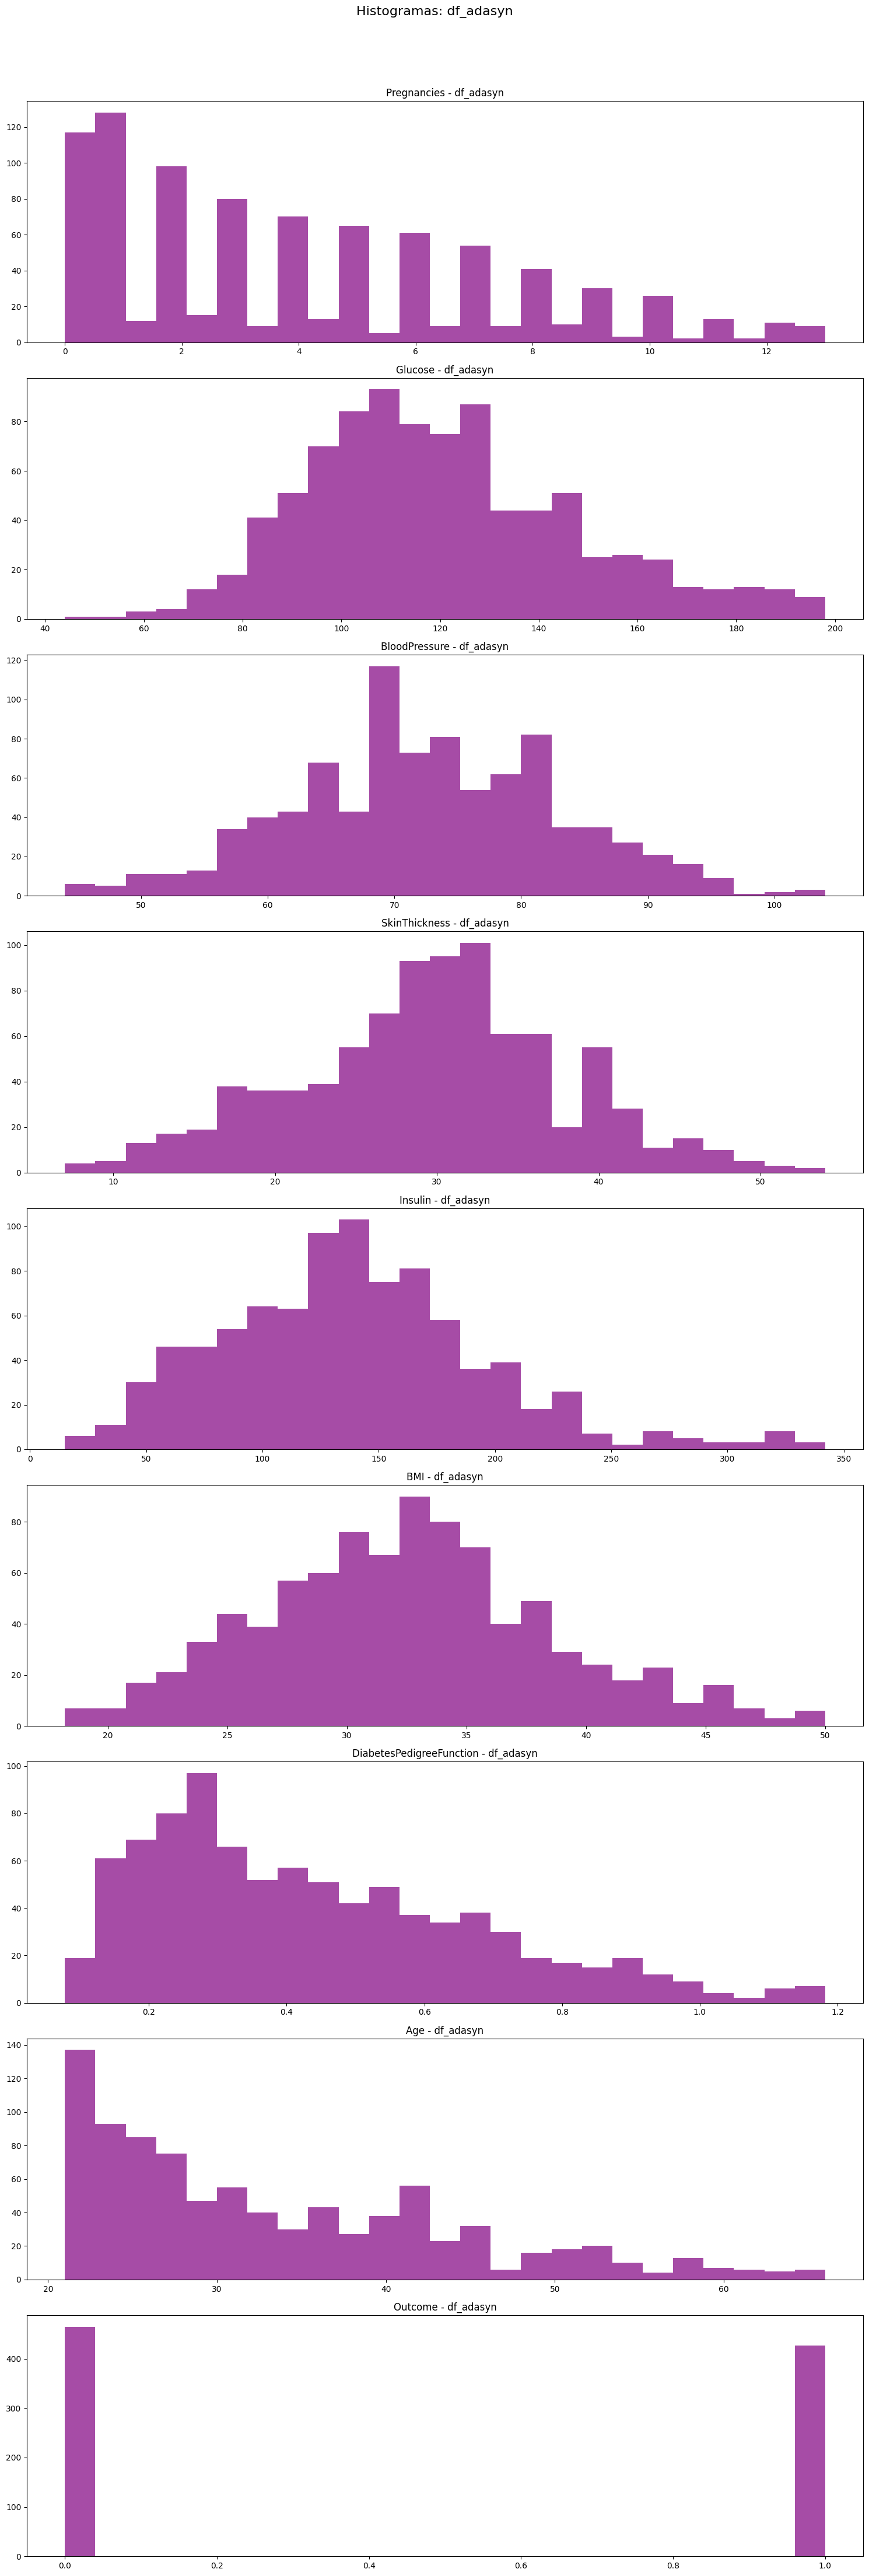

In [147]:
# Generar histogramas para cada variable en df_imputed
# Generar gráficos en parejas para cada variable en df_filtered y df_imputed
variables = df_filtered.columns

fig, axes = plt.subplots(len(variables), 2, figsize=(15, 5 * len(variables)))
fig.suptitle('Comparación de Histogramas: df_filtered vs df_imputed', fontsize=16)

for i, var in enumerate(variables):
    # Histograma para df_filtered
    axes[i, 0].hist(df_filtered[var].dropna(), bins=25, alpha=0.7, color='blue')
    axes[i, 0].set_title(f'{var} - df_filtered')
    
    # Histograma para df_imputed
    axes[i, 1].hist(df_imputed[var].dropna(), bins=25, alpha=0.7, color='green')
    axes[i, 1].set_title(f'{var} - df_imputed')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Generar histogramas para cada variable en df_adasyn
fig, axes = plt.subplots(len(variables), 1, figsize=(15, 5 * len(variables)))
fig.suptitle('Histogramas: df_adasyn', fontsize=16)

for i, var in enumerate(variables):
    # Histograma para df_adasyn
    axes[i].hist(df_adasyn[var].dropna(), bins=25, alpha=0.7, color='purple')
    axes[i].set_title(f'{var} - df_adasyn')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()